### ***Predicting carbon dioxide emission from sustainable smart city environment perspective and its effect on the environment. This project uses the Canadian Government dataset.***

***Introduction:***

Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce the carbon footprint. We are moving closer to the planet’s 2030 deadline, after which the damage done from climate change may be irreversible. 

The push toward an sustanable smart society has led many manufacturers to create more sustainable automobiles-a plug-in hybrid, a hybrid and electric.
This is the data of CO2 Emission by the canadian vehicles for year 1995-2014. I am using this data to create the models that will give 85-100% accuracy in forcasting the near future CO2 emmission. 


Environment Setup

In [1]:
#import Libraries
## For data
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)

## For plotting
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

## For machine learning
from sklearn.model_selection import train_test_split

## for Time
import time

## To standardise the data input
from sklearn.preprocessing import StandardScaler




**Load the first file that contains the data for year 1995-1999**

In [2]:
#Read data
df1=pd.read_csv("Original_1995-1999_Fuel_Consumption_Ratings_(2-cycle).csv", skiprows=[i for i in range(3521,3542)]) 
# Remove first row after the heading that contain partial headings and nans
df1.drop(index=0,axis=1, inplace=True)
print(df1.head(10))

   MODEL        MAKE       MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS  \
1   1995       ACURA       INTEGRA    SUBCOMPACT         1.8        4.0   
2   1995       ACURA       INTEGRA    SUBCOMPACT         1.8        4.0   
3   1995       ACURA  INTEGRA GS-R    SUBCOMPACT         1.8        4.0   
4   1995       ACURA        LEGEND       COMPACT         3.2        6.0   
5   1995       ACURA  LEGEND COUPE       COMPACT         3.2        6.0   
6   1995       ACURA  LEGEND COUPE       COMPACT         3.2        6.0   
7   1995       ACURA           NSX    TWO-SEATER         3.0        6.0   
8   1995       ACURA           NSX    TWO-SEATER         3.0        6.0   
9   1995  ALFA ROMEO        164 LS       COMPACT         3.0        6.0   
10  1995  ALFA ROMEO        164 LS       COMPACT         3.0        6.0   

   TRANSMISSION FUEL FUEL CONSUMPTION Unnamed: 9 Unnamed: 10 Unnamed: 11  \
1            A4    X             10.2        7.0         8.8          32   
2            M5    X  

In [3]:
df1["CO2 EMISSIONS "]=df1["CO2 EMISSIONS "].astype('float64')
df1.describe()

,CYLINDERS,CO2 EMISSIONS
count,3519.000000,3519.000000
mean,5.780904,261.757602
std,1.641738,63.564076
min,2.000000,113.000000
25%,4.000000,216.000000
50%,6.000000,253.000000
75%,6.000000,304.000000
max,12.000000,490.000000


Average CO2 Emmision produced with the vehicles for year 1995-1999 is 261.758 grams per kilometre. 



Companies has come up with fact that CO2 emmision can be reduced by introducing the new technologies.

**Load the second file that contains the data for year 2000-2014**

In [4]:
df2=pd.read_csv("Original MY2000-2014 Fuel Consumption Ratings (2-cycle).csv", skiprows=[i for i in range(14255,14276)])
# drop empty columns from the dataframe
df2.dropna(how='all', axis=1,inplace=True)
#Drop the first row from the dataframe that contain sub-headings
df2.drop(index=0, inplace=True)
print("Shape of the first file:",df2.shape)
print("\n",df2.head())

Shape of the first file: (14253, 13)

   MODEL   MAKE  MODEL.1 VEHICLE CLASS ENGINE SIZE  CYLINDERS TRANSMISSION  \
1  2000  ACURA    1.6EL       COMPACT         1.6        4.0           A4   
2  2000  ACURA    1.6EL       COMPACT         1.6        4.0           M5   
3  2000  ACURA    3.2TL      MID-SIZE         3.2        6.0          AS5   
4  2000  ACURA    3.5RL      MID-SIZE         3.5        6.0           A4   
5  2000  ACURA  INTEGRA    SUBCOMPACT         1.8        4.0           A4   

  FUEL FUEL CONSUMPTION Unnamed: 9 Unnamed: 10 Unnamed: 11 CO2 EMISSIONS   
1    X              9.2        6.7         8.1          35            186  
2    X              8.5        6.5         7.6          37            175  
3    Z             12.2        7.4        10.0          28            230  
4    Z             13.4        9.2        11.5          25            264  
5    X             10.0        7.0         8.6          33            198  


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,4,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:

# Convert the datatype of 'CO2 EMISSIONS' column to float
df2["CO2 EMISSIONS "]=df2["CO2 EMISSIONS "].astype('float64')
df2.describe()

,CYLINDERS,CO2 EMISSIONS
count,14253.000000,14253.000000
mean,5.991230,248.790149
std,1.774154,59.077190
min,2.000000,83.000000
25%,4.000000,209.000000
50%,6.000000,239.000000
75%,8.000000,285.000000
max,16.000000,570.000000


Mean Emmission for year 2000-2014 data is 248.790 grams per kilometer. The average CO2 emissions, based on laboratory tests, of a new car registered in the EU in 2016 was 118.1 grams per kilometre (g/km) and the 2021 target was 95 g/km. Emissions from new vans must fall by more than 11 % to meet the 2020 target (147 g/km). 

Concatenate both the dataframes

In [6]:
#"stack" the two DataFrames(files) together
combined_df= pd.concat([df1,df2], ignore_index=True)
print("Combined dataset shape:",combined_df.shape)
print("\nDatatypes of the dataframe:\n")
print(combined_df.dtypes)

Combined dataset shape: (17772, 13)

Datatypes of the dataframe:

MODEL                object
MAKE                 object
MODEL.1              object
VEHICLE CLASS        object
ENGINE SIZE          object
CYLINDERS           float64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION     object
Unnamed: 9           object
Unnamed: 10          object
Unnamed: 11          object
CO2 EMISSIONS       float64
dtype: object


Preprocessing

In [7]:
# Renaming the columns
combined_df.rename(columns={'MODEL':'MODEL YEAR'}, inplace=True)
combined_df.rename(columns={'MODEL.1':'MODEL'}, inplace=True)
combined_df.rename(columns={'CO2 EMISSIONS ':'CO2_EMISSIONS'}, inplace=True)
combined_df.rename(columns={'FUEL':'FUEL TYPE'}, inplace=True)
combined_df.rename(columns={'FUEL CONSUMPTION':'Consumption_CITY'}, inplace=True)
combined_df.rename(columns={'Unnamed: 9':'Consumption_HWY'}, inplace=True)
combined_df.rename(columns={'Unnamed: 10':'COMB (L/100 km)'}, inplace=True)
combined_df.rename(columns={'Unnamed: 11':'COMB (mpg)'}, inplace=True)
combined_df.rename(columns={'Fuel':'Fuel Type'}, inplace=True)

In [8]:
combined_df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'Consumption_CITY',
       'Consumption_HWY', 'COMB (L/100 km)', 'COMB (mpg)', 'CO2_EMISSIONS'],
      dtype='object')

In [9]:
# conversions to float

combined_df["Consumption_CITY"]=combined_df["Consumption_CITY"].astype('float64')
combined_df["Consumption_HWY"]=combined_df["Consumption_HWY"].astype('float64')
combined_df["COMB (L/100 km)"]=combined_df["COMB (L/100 km)"].astype('float64')
combined_df["COMB (mpg)"]=combined_df["COMB (mpg)"].astype('float64')
combined_df["CO2_EMISSIONS"]=combined_df["CO2_EMISSIONS"].astype('float64')
combined_df["ENGINE SIZE"]=combined_df["ENGINE SIZE"].astype('float64')
combined_df["FUEL TYPE"]=combined_df["FUEL TYPE"].astype('category')
combined_df["TRANSMISSION"]=combined_df["TRANSMISSION"].astype('category')
#combined_df["MODEL"]=combined_df["MODEL"].astype('category')

combined_df.dtypes

MODEL YEAR            object
MAKE                  object
MODEL                 object
VEHICLE CLASS         object
ENGINE SIZE          float64
CYLINDERS            float64
TRANSMISSION        category
FUEL TYPE           category
Consumption_CITY     float64
Consumption_HWY      float64
COMB (L/100 km)      float64
COMB (mpg)           float64
CO2_EMISSIONS        float64
dtype: object

Univariate Analysis

In [10]:
#Check for null values
print(combined_df.info())
#Extended data dictionary
print("\n",combined_df.describe())
combined_df.reset_index(inplace = True, drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17772 entries, 0 to 17771
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MODEL YEAR        17772 non-null  object  
 1   MAKE              17772 non-null  object  
 2   MODEL             17772 non-null  object  
 3   VEHICLE CLASS     17772 non-null  object  
 4   ENGINE SIZE       17772 non-null  float64 
 5   CYLINDERS         17772 non-null  float64 
 6   TRANSMISSION      17772 non-null  category
 7   FUEL TYPE         17772 non-null  category
 8   Consumption_CITY  17772 non-null  float64 
 9   Consumption_HWY   17772 non-null  float64 
 10  COMB (L/100 km)   17772 non-null  float64 
 11  COMB (mpg)        17772 non-null  float64 
 12  CO2_EMISSIONS     17772 non-null  float64 
dtypes: category(2), float64(7), object(4)
memory usage: 1.5+ MB
None

         ENGINE SIZE     CYLINDERS  Consumption_CITY  Consumption_HWY  \
count  17772.000000  17772.

In this exploratory analysis, the interquartile range shows the absence of outliers. City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - combined rating (55% city, 45% hwy) is shown in L/100 km. Total average CO2 Emission is 251.36 gm/100 KM.

Bivariate Analysis

In [11]:
combined_df.corr()

,ENGINE SIZE,CYLINDERS,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
ENGINE SIZE,1.000000,0.901764,0.822413,0.769961,0.812903,-0.772701,0.829316
CYLINDERS,0.901764,1.000000,0.785800,0.699951,0.763874,-0.722993,0.787079
Consumption_CITY,0.822413,0.785800,1.000000,0.953158,0.993998,-0.925755,0.925993
Consumption_HWY,0.769961,0.699951,0.953158,1.000000,0.979882,-0.890077,0.905464
COMB (L/100 km),0.812903,0.763874,0.993998,0.979882,1.000000,-0.923600,0.929130
COMB (mpg),-0.772701,-0.722993,-0.925755,-0.890077,-0.923600,1.000000,-0.904579
CO2_EMISSIONS,0.829316,0.787079,0.925993,0.905464,0.929130,-0.904579,1.000000


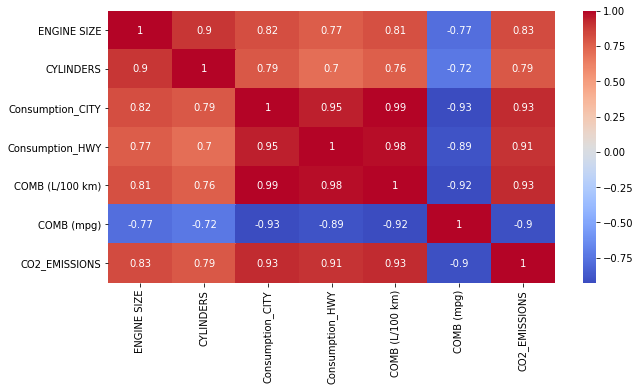

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(combined_df.corr(), annot=True, cmap="coolwarm")

There is direct corelation between 'CO2 Emission' and 'Combined consumption of fuel at highway and city'.

In [13]:
# To see the pairwise correlation
combined_df.corr()

,ENGINE SIZE,CYLINDERS,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
ENGINE SIZE,1.000000,0.901764,0.822413,0.769961,0.812903,-0.772701,0.829316
CYLINDERS,0.901764,1.000000,0.785800,0.699951,0.763874,-0.722993,0.787079
Consumption_CITY,0.822413,0.785800,1.000000,0.953158,0.993998,-0.925755,0.925993
Consumption_HWY,0.769961,0.699951,0.953158,1.000000,0.979882,-0.890077,0.905464
COMB (L/100 km),0.812903,0.763874,0.993998,0.979882,1.000000,-0.923600,0.929130
COMB (mpg),-0.772701,-0.722993,-0.925755,-0.890077,-0.923600,1.000000,-0.904579
CO2_EMISSIONS,0.829316,0.787079,0.925993,0.905464,0.929130,-0.904579,1.000000


The correlation analysis shows that in our dataset, the variables are strongly correlated: corr (CO2 EMISSIONS, Consumption_CITY) = 0.9259; corr (CO2 EMISSIONS, COMB (L/100 km) = 0.9291; corr (CO2 EMISSIONS, Consumption_HWY) = 0.9054; corr (CO2 EMISSIONS, ENGINE SIZE) = 0.829316.
The columns that have higher correlation with our independent column(CO2 EMISSIONS) is the Combined Consumption 'COMB(L/100 Km)'. 


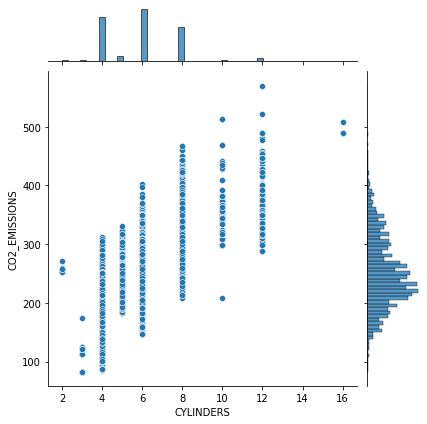

In [ ]:
#Scatterplots
sns.jointplot(x="CYLINDERS", y="CO2_EMISSIONS", data=combined_df)

The above scatter plot shows that their is some correlation between the number Cylinders and CO2 Emission. But it is not a strong correlation.

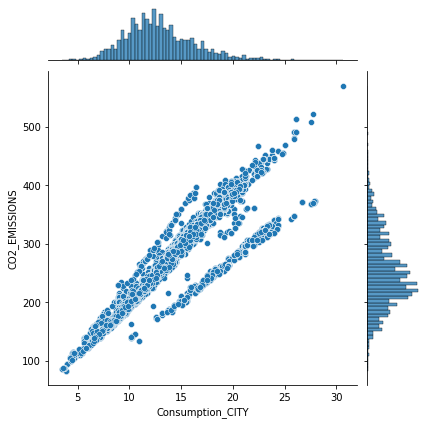

In [ ]:
sns.jointplot(x="Consumption_CITY",y="CO2_EMISSIONS", data=combined_df)

This scatter plot shows that their is a positive correlation between fuel consumption in the city and CO2 Emission.

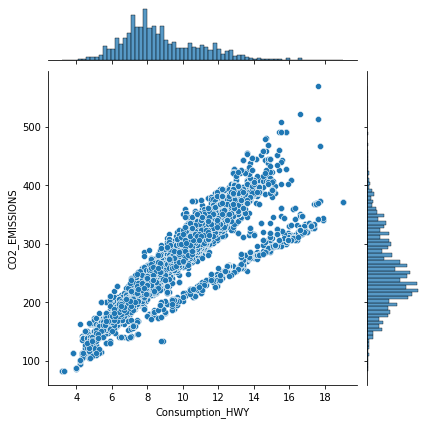

In [ ]:
sns.jointplot(x="Consumption_HWY",y="CO2_EMISSIONS", data=combined_df)

"Consumption_HWY" and "CO2_EMISSIONS" shows a very strong positive correlation. 

ValueError: ignored

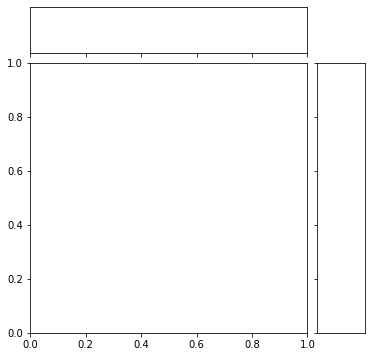

In [ ]:
sns.jointplot(x="ENGINE SIZE",y="CO2 EMISSIONS", data=combined_df)

In [ ]:
sns.jointplot(x="COMB (L/100 km)",y="CO2 EMISSIONS", data=combined_df)

This plot shows a positive correlation but not as strong as "Consumption_HWY" and "CO2 EMISSIONS".

In [ ]:
sns.jointplot(x="FUEL TYPE",y="CO2_EMISSIONS", data=combined_df)

This graph shows that vehicle that use Fuel Type "Z" produces much emmission. Here "Z" is Premium Gasoline.

In [ ]:
sns.jointplot(x="TRANSMISSION",y="CO2_EMISSIONS", data=combined_df)

There is no correlation between our independent variable "CO2 EMISSIONS" and "TRANSMISSION".

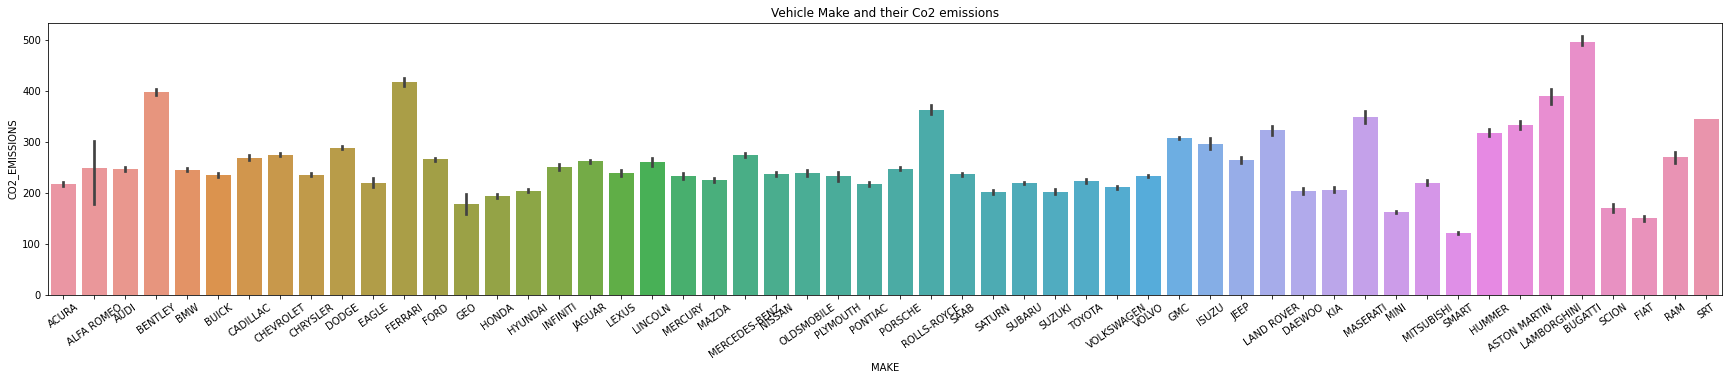

In [ ]:
# Co2 emission on the bases of make of the car
f, ax = plt.subplots(figsize=(30,5))
x = combined_df.MAKE.value_counts().sort_values()
ax = sns.barplot(data=combined_df,x='MAKE',y='CO2_EMISSIONS')
plt.title('Vehicle Make and their Co2 emissions')
plt.xticks(rotation=35)
plt.show()

The bar graph shows that Lamborghini produces the higher emmision that any other vehicle. Ferrari and Bentley comes at second and third position respectively in term of producing high amount of carbon footprint. These compnies needs to take some actions to avoid producing so much co2 content in the environment.

In [ ]:
# Top 10 vehicles with highest carbon dioxide emissions
High_to_low=(combined_df.sort_values(by='CO2_EMISSIONS',ascending=False)[0:10]).round(1)
High_to_low.head(10)

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
5832,2003,FERRARI,ENZO,TWO-SEATER,6.0,12.0,AS6,Z,30.6,17.6,24.8,11.0,570.0
3734,2000,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12.0,M6,Z,27.7,16.6,22.7,12.0,522.0
7618,2005,DODGE,RAM SRT-10,PICKUP TRUCK - STANDARD,8.3,10.0,A4,Z,26.1,17.6,22.3,13.0,513.0
8636,2006,DODGE,RAM SRT-10,PICKUP TRUCK - STANDARD,8.3,10.0,A4,Z,26.1,17.6,22.3,13.0,513.0
12633,2010,BUGATTI,VEYRON,TWO-SEATER,8.0,16.0,AS7,Z,27.5,15.5,22.1,13.0,508.0
13083,2010,LAMBORGHINI,MURCIELAGO,TWO-SEATER,6.5,12.0,M6,Z,25.9,15.8,21.3,13.0,490.0
14715,2012,BUGATTI,VEYRON,TWO-SEATER,8.0,16.0,AS7,Z,26.1,15.5,21.3,13.0,490.0
3054,1999,FERRARI,550 MARANELLO,TWO-SEATER,5.5,12.0,M6,Z,26.1,15.4,21.3,13.0,490.0
10943,2008,LAMBORGHINI,MURCIELARGO,TWO-SEATER,6.5,12.0,M6,Z,25.9,15.8,21.3,13.0,490.0
10945,2008,LAMBORGHINI,MURCIELARGO ROADSTER,TWO-SEATER,6.5,12.0,M6,Z,25.9,15.8,21.3,13.0,490.0


In [ ]:
# Top 10 vehicles with lowest carbon dioxide emissions
low_to_high=(combined_df.sort_values(by='CO2_EMISSIONS',ascending=True)[0:10]).round(1)
low_to_high.head(10)

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
5221,2002,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
6836,2004,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.3,3.6,78.0,83.0
4501,2001,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
3847,2000,HONDA,INSIGHT,SUBCOMPACT,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
8776,2006,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.3,3.6,78.0,83.0
7778,2005,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.3,3.6,78.0,83.0
5976,2003,HONDA,INSIGHT,TWO-SEATER,1.0,3.0,M5,X,3.9,3.2,3.6,78.0,83.0
15603,2012,TOYOTA,PRIUS c,COMPACT,1.5,4.0,AV,X,3.5,4.0,3.7,76.0,85.0
16662,2013,TOYOTA,PRIUS c,COMPACT,1.5,4.0,AV,X,3.5,4.0,3.7,76.0,85.0
16661,2013,TOYOTA,PRIUS,MID-SIZE,1.8,4.0,AV,X,3.7,4.0,3.8,74.0,87.0


CO2 Emission Per fuel type


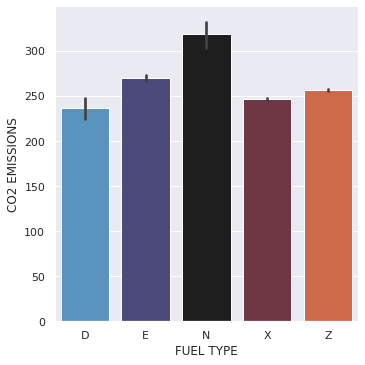

In [ ]:
# CO2 Emission Per fuel type
sns.set()
print("CO2 Emission Per fuel type")
g = sns.catplot(x ="FUEL TYPE", y ="CO2 EMISSIONS", data =combined_df , kind = "bar", palette="icefire")
plt.show()

CO2 Emission Per class type


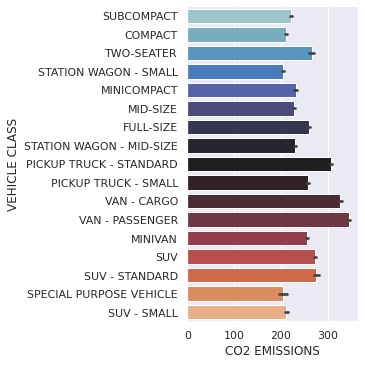

In [ ]:
# CO2 Emission Per class type
sns.set()
print("CO2 Emission Per class type")
g = sns.catplot(y ="VEHICLE CLASS", x ="CO2 EMISSIONS", data =combined_df , kind = "bar", palette="icefire")
plt.show()

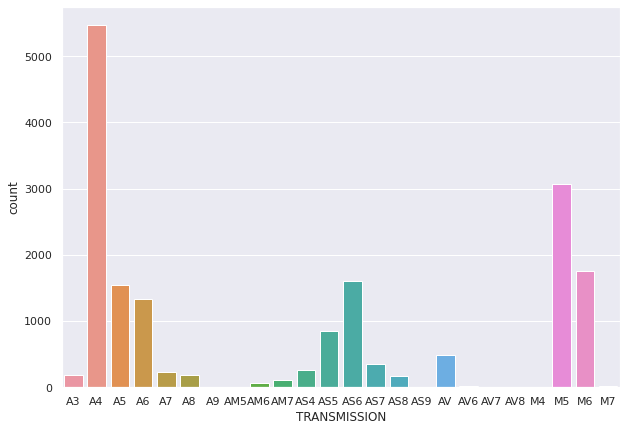

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(x= combined_df["TRANSMISSION"])

CO2 Emission Per fuel type


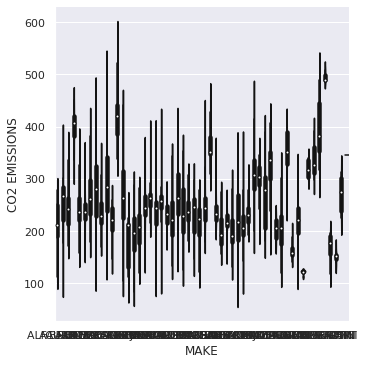

In [ ]:
# CO2 Emission Per Make
sns.set()
print("CO2 Emission Per fuel type")
g = sns.catplot(x ="MAKE", y ="CO2 EMISSIONS", data =combined_df , kind = "violin", palette="icefire")
plt.show()

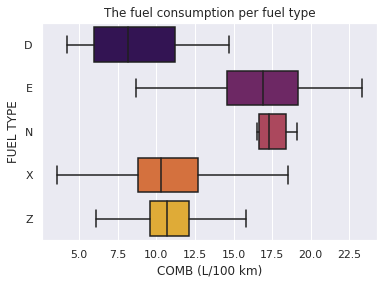

In [ ]:
# Checking fuel consumption by type
sns.set()
plt.title("The fuel consumption per fuel type")
sns.boxplot(x="COMB (L/100 km)", y = "FUEL TYPE", data= combined_df, palette="inferno", sym = "")
plt.show()

##Prepare data to Split into test and train data

Feature Selection

In [14]:
# Take the highly correlated fields in X and store the dependent variable in Y.
print(combined_df.dtypes)
X=combined_df[['ENGINE SIZE', 'CYLINDERS','Consumption_CITY','Consumption_HWY', 'COMB (L/100 km)']]
y=combined_df["CO2_EMISSIONS"]

MODEL YEAR            object
MAKE                  object
MODEL                 object
VEHICLE CLASS         object
ENGINE SIZE          float64
CYLINDERS            float64
TRANSMISSION        category
FUEL TYPE           category
Consumption_CITY     float64
Consumption_HWY      float64
COMB (L/100 km)      float64
COMB (mpg)           float64
CO2_EMISSIONS        float64
dtype: object


In [15]:
#X.columns
print(X.shape)
print(y.shape)

(17772, 5)
(17772,)


In [16]:
# To see the unique values in the specific columns
for column in X.columns:
  uniques = sorted(combined_df[column].unique())
  print(column, uniques[:5])
  #print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

ENGINE SIZE [0.8, 1.0, 1.2, 1.3, 1.4]
CYLINDERS [2.0, 3.0, 4.0, 5.0, 6.0]
Consumption_CITY [3.5, 3.6, 3.7, 3.9, 4.0]
Consumption_HWY [3.2, 3.3, 3.8, 4.0, 4.2]
COMB (L/100 km) [3.6, 3.7, 3.8, 4.1, 4.2]


Split the dataset with 70-30

In [17]:
def split_70(X,y):
  X_train, X_test, Y_train,  Y_test= train_test_split(X,y,test_size=0.30,random_state=42)
  return X_train, X_test, Y_train,  Y_test
def split_90(X,y):
   X_train, X_test, Y_train,  Y_test= train_test_split(X,y,test_size=0.10,random_state=42)
   return X_train, X_test, Y_train,  Y_test
  

In [18]:
X_train, X_test, Y_train,  Y_test =  split_70(X,y)
#X_train, X_test, Y_train,  Y_test =  split_90(X,y)
print("X_train:",X_train.shape)
print("Y_train:",Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:",Y_test.shape)
X_train.describe()

X_train: (12440, 5)
Y_train: (12440,)
X_test: (5332, 5)
Y_test: (5332,)


,ENGINE SIZE,CYLINDERS,Consumption_CITY,Consumption_HWY,COMB (L/100 km)
count,12440.000000,12440.000000,12440.000000,12440.000000,12440.000000
mean,3.464461,5.959807,13.011391,8.901415,11.162765
std,1.332150,1.748885,3.489796,2.331651,2.937403
min,0.800000,2.000000,3.500000,3.200000,3.600000
25%,2.400000,4.000000,10.600000,7.300000,9.200000
50%,3.300000,6.000000,12.500000,8.300000,10.600000
75%,4.300000,8.000000,15.000000,10.400000,12.900000
max,8.400000,16.000000,30.600000,19.000000,24.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f7f1e090>,
      dtype=object)

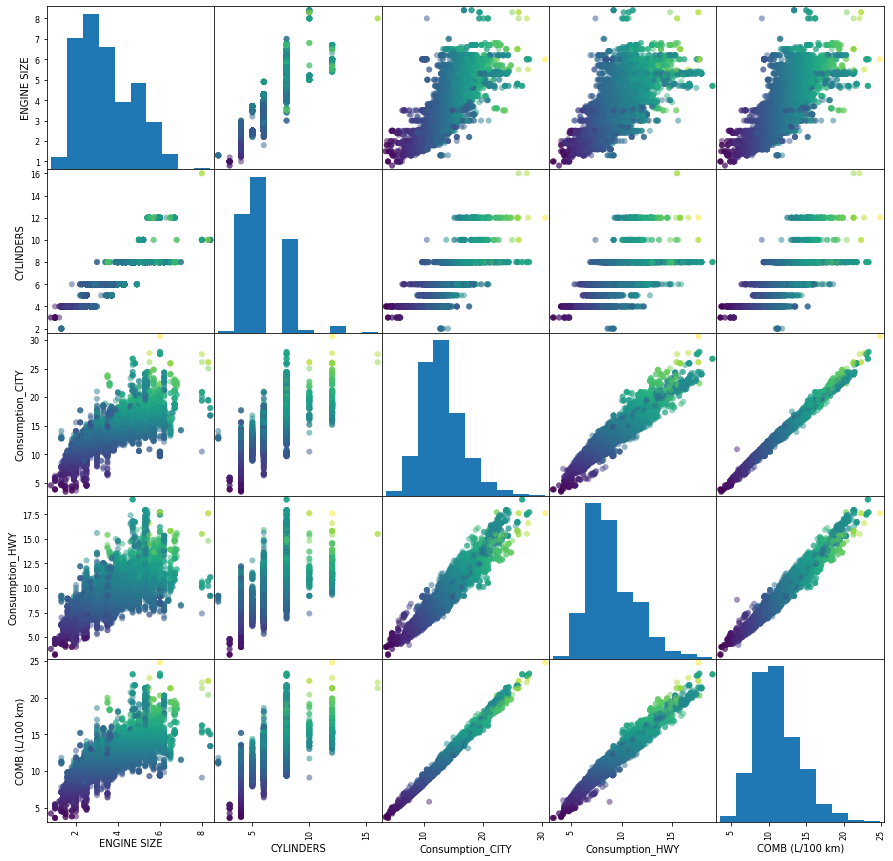

In [ ]:
from matplotlib import cm
colmap= cm.get_cmap("gnuplot")
## Scatter plot using the pandas scatter_matrix
pd.plotting.scatter_matrix(X_train, c= Y_train, marker='o', figsize=(15,15))

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[ 1.8,  4. , 10.2,  7. ,  8.8],
       [ 1.8,  4. ,  9.6,  7. ,  8.4],
       [ 1.8,  4. ,  9.4,  7. ,  8.3],
       ...,
       [ 3. ,  6. , 11.9,  8.3, 10.3],
       [ 3.2,  6. , 11.4,  7.8,  9.8],
       [ 3.2,  6. , 13.3,  8.6, 11.2]])

## *Linear Regression:*

In [19]:
def MAPE(Y_actual,Y_Predicted):
     mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
     return mape

In [20]:
 ## Linear regression
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import r2_score
 from sklearn.metrics import accuracy_score
 #Defining MAPE function
 
 
 def LR_model(X_train, X_test, Y_train,  Y_test):
   len=Y_test.shape[0]
   start_time= time.process_time()
   lr= LinearRegression()
   lr.fit(X_train,Y_train)
   y_pred=lr.predict(X_test)
   end_time= time.process_time()

   print("Time taken (in seconds):",np.round((end_time-start_time),4))
   MAE_LR= np.mean(np.abs(Y_test-y_pred))
   print("Mean absolute error(MAE):",np.round(MAE_LR,3))
   RMSE_LR= np.sqrt(np.mean((Y_test-y_pred)**2))
   print("RMSE of Linear Model =",np.round(RMSE_LR,3))
 
   
 
   LR_MAPE= MAPE(Y_test,y_pred)
   print("MAPE: ",LR_MAPE)
 
   Accuracy_lr=np.round(r2_score(Y_test,y_pred),4)
   print("Accuracy of Linear Regression Model:{}%".format(Accuracy_lr*100) )

RMSE of linear regression model is 20.45 which is less than the RMSE of baseline line model 59.67. It also gives r2 score of 0.88 which is near 1. Both parameters indicate that Linear model performs great than our baseline model on the data. 

Experiment 1:
split 70:30

In [21]:
X_train, X_test, Y_train,  Y_test =  split_70(X,y)
LR_model(X_train, X_test, Y_train,  Y_test)

Time taken (in seconds): 0.0132
Mean absolute error(MAE): 12.3
RMSE of Linear Model = 20.45
MAPE:  4.845825947422598
Accuracy of Linear Regression Model:88.25%


Experiment 1:
split 90-10

In [22]:
X_train, X_test, Y_train,  Y_test =  split_90(X,y)
LR_model(X_train, X_test, Y_train,  Y_test)

Time taken (in seconds): 0.0069
Mean absolute error(MAE): 12.591
RMSE of Linear Model = 21.179
MAPE:  4.899480548905414
Accuracy of Linear Regression Model:87.02%


## *Support Vector Regression:*

In [23]:
## Support vector regression
from sklearn import preprocessing
from sklearn import svm

In [24]:
def SVR_model(X_train, X_test, Y_train,  Y_test):
  start_time=time.process_time()
  scaler = preprocessing.StandardScaler().fit(X_train)
  X_train_transformed = scaler.transform(X_train)
  clf = svm.SVR(C=1).fit(X_train, Y_train)
  y_pred= clf.predict(X_test)
  print("Time taken:",time.process_time()-start_time)
  #X_test_transformed = scaler.transform(X_test)
  Accuracy_SVR=np.round(clf.score(X_test, Y_test),2)
  print("Accuracy of Support vector regression is: {}%".format(Accuracy_SVR*100))
  MAE_SVR= np.mean(np.abs(Y_test-y_pred))
  print("Mean absolute error(MAE):",np.round(MAE_SVR,3))
  RMSE_SVR= np.sqrt(np.mean((Y_test-y_pred)**2))
  print("RMSE of SVR Model =",np.round(RMSE_SVR,3))
  MAPE_SVR= MAPE(Y_test,y_pred)
  print("MAPE of SVR model:",MAPE_SVR)

Experiment 1: split 70-30

In [25]:
X_train, X_test, Y_train,  Y_test =  split_70(X,y)
SVR_model(X_train, X_test, Y_train,  Y_test)

Time taken: 11.972992383
Accuracy of Support vector regression is: 90.0%
Mean absolute error(MAE): 5.33
RMSE of SVR Model = 18.487
MAPE of SVR model: 2.1138923443071276


Experiment 2: split 90-10

In [26]:
X_train, X_test, Y_train,  Y_test =  split_90(X,y)
SVR_model(X_train, X_test, Y_train,  Y_test)

Time taken: 17.060448457999996
Accuracy of Support vector regression is: 90.0%
Mean absolute error(MAE): 5.391
RMSE of SVR Model = 18.378
MAPE of SVR model: 2.0979865960994015


## *Decision tree:*

In [54]:
#Decision tree training with gini
from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeClassifier()
def DTGi_model(X_train, X_test, Y_train,  Y_test):
  start_time=time.process_time()
  model= DecisionTreeRegressor(random_state = 100,max_depth=25, min_samples_leaf=5)
  # Fit the model   
  model.fit(X_train,Y_train)
  y_pred = model.predict(X_test)
  
  print("Time taken:",np.round((time.process_time()-start_time),3))
  # Find the accuracy of the trained model
  Acc= model.score(X_test, Y_test)
  print("Accuracy using Decision Tree Classifier: {}%".format(Acc*100)) 
  MAE_DT= np.mean(np.abs(Y_test-y_pred))
  print("Mean absolute error(MAE):",np.round(MAE_DT,3))
  RMSE_DT= np.sqrt(np.mean((Y_test-y_pred)**2))
  print("RMSE =",np.round(RMSE_DT,3))
  MAPE_DT= MAPE(Y_test,y_pred)
  print("MAPE of decesion tree model:",MAPE_DT)

Exp 1:

In [55]:
X_train, X_test, Y_train,  Y_test =  split_70(X,y)
print(X_train.shape)
print(Y_train.shape)
DTGi_model(X_train, X_test, Y_train,  Y_test)

(12440, 5)
(12440,)
Time taken: 0.023
Accuracy using Decision Tree Classifier: 97.98277616897717%
Mean absolute error(MAE): 1.614
RMSE = 8.473
MAPE of decesion tree model: 0.6243844660518353


Exp 90-10

In [56]:
X_train, X_test, Y_train,  Y_test =  split_90(X,y)
DTGi_model(X_train, X_test, Y_train,  Y_test)

Time taken: 0.027
Accuracy using Decision Tree Classifier: 98.33262362912143%
Mean absolute error(MAE): 1.437
RMSE = 7.592
MAPE of decesion tree model: 0.5520625025935678


## *Random Forest Regressor:*

In [44]:
#Random Forest implementation
from sklearn.ensemble import RandomForestRegressor
def RF_model(X_train, X_test, Y_train,  Y_test):
  start_time=time.process_time()
  # Create the model with 100 trees
  #model = RandomForestRegressor(n_estimators=50,random_state=0)
  model = RandomForestRegressor(n_jobs=-1)
  # Fit on training data
  model.fit(X_train, Y_train)
  # y prediction on the test data
  y_pred =model.predict(X_test)
  #print(y_pred)
  print("Time taken:",np.round((time.process_time()-start_time),3))
  # Find the accuracy of the trained model
  print("Accuracy of Random forest: {}%".format(accuracy_score(Y_test,y_pred)*100))
  MAE_RF= np.mean(np.abs(Y_test-y_pred))
  print("Mean absolute error(MAE):",np.round(MAE_RF,3))
  RMSE_RF= np.sqrt(np.mean((Y_test-y_pred)**2))
  print("RMSE =",np.round(RMSE_RF,3))
  MAPE_DT= MAPE(Y_test,y_pred)
  print("MAPE of model:",MAPE_DT)

In [47]:
model = RandomForestRegressor(n_jobs=-1)

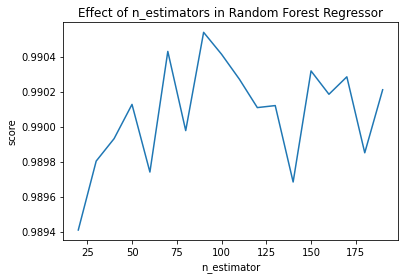

In [60]:
estimators = np.arange(20, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators in Random Forest Regressor")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)


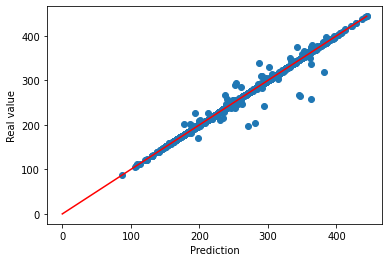

In [62]:
y_pred =model.predict(X_test)
# Build a plot
plt.scatter(y_pred, Y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(Y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test, Y_train,  Y_test =  split_70(X,y)
RF_model(X_train, X_test, Y_train,  Y_test)

In [ ]:
X_train, X_test, Y_train,  Y_test =  split_90(X,y)
RF_model(X_train, X_test, Y_train,  Y_test)

Time taken: 1.221
Accuracy of Random forest: 98.08773903262093%
Mean absolute error(MAE): 0.595
RMSE = 7.178
MAPE of model: 0.22976684866528313


LightGBM

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb



In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
def  lgb_model(train_data,valid_data):
  start_time=time.process_time()
  cv_results = lgb.cv(param, train_data, num_boost_round=num_round, nfold=10,verbose_eval=20, early_stopping_rounds=20,stratified=False)
  model=lgb.train(param,train_data,len(cv_results['rmse-mean']))
  y_pred = model.predict(X_test)
  print("Time taken:",np.round((time.process_time()-start_time),3))
  print("Accuracy of LightGBM is: {}%".format(metrics.r2_score(Y_test,y_pred)*100))
  lgb_rmse=np.sqrt(metrics.mean_squared_error(y_pred, Y_test))
  print("RMSE for Light GBM is ",lgb_rmse)
  MAE_RF= np.mean(np.abs(Y_test-y_pred))
  print("Mean absolute error(MAE):",np.round(MAE_RF,3))
  RMSE_RF= np.sqrt(np.mean((Y_test-y_pred)**2))
  print("RMSE =",np.round(RMSE_RF,3))
  MAPE_DT= MAPE(Y_test,y_pred)
  print("MAPE of model:",MAPE_DT)


In [ ]:
X_train, X_test, Y_train,  Y_test =  split_70(X,y)
train_data=lgb.Dataset(X_train,label=Y_train)
valid_data=lgb.Dataset(X_test,label=Y_test)
param = {'num_leaves':31, 'num_trees':5000,'objective':'regression'}
param['metric'] = 'l2_root'
num_round=5000
lgb_model(train_data,valid_data)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	cv_agg's rmse: 12.9258 + 0.710346
[40]	cv_agg's rmse: 9.47854 + 0.851403
[60]	cv_agg's rmse: 8.83563 + 0.842068
[80]	cv_agg's rmse: 8.57653 + 0.856016
[100]	cv_agg's rmse: 8.40622 + 0.847741
[120]	cv_agg's rmse: 8.27509 + 0.84463
[140]	cv_agg's rmse: 8.14327 + 0.830164
[160]	cv_agg's rmse: 8.02885 + 0.830452
[180]	cv_agg's rmse: 7.95243 + 0.826165
[200]	cv_agg's rmse: 7.87533 + 0.821461
[220]	cv_agg's rmse: 7.79441 + 0.820591
[240]	cv_agg's rmse: 7.72455 + 0.821236
[260]	cv_agg's rmse: 7.67019 + 0.824319
[280]	cv_agg's rmse: 7.59302 + 0.822864
[300]	cv_agg's rmse: 7.54718 + 0.8241
[320]	cv_agg's rmse: 7.49473 + 0.829363
[340]	cv_agg's rmse: 7.44779 + 0.837608
[360]	cv_agg's rmse: 7.40872 + 0.841278
[380]	cv_agg's rmse: 7.36842 + 0.847084
[400]	cv_agg's rmse: 7.33698 + 0.852818
[420]	cv_agg's rmse: 7.31123 + 0.856515
[440]	cv_agg's rmse: 7.28117 + 0.870311
[460]	cv_agg's rmse: 7.24425 + 0.867607
[480]	cv_agg's rmse: 7.21562 + 0.870103
[500]	cv_agg's rmse: 7.1926 + 0.866814
[520]	cv

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Time taken: 42.311
Accuracy of LightGBM is: 98.9840981133467%
RMSE for Light GBM is  6.013237373900342
Mean absolute error(MAE): 1.49
RMSE = 6.013
MAPE of model: 0.5616282313802123


In [ ]:
X_train, X_test, Y_train,  Y_test =  split_90(X,y)
train_data=lgb.Dataset(X_train,label=Y_train)
valid_data=lgb.Dataset(X_test,label=Y_test)
param = {'num_leaves':31, 'num_trees':5000,'objective':'regression'}
param['metric'] = 'l2_root'
num_round=5000
lgb_model(train_data,valid_data)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[20]	cv_agg's rmse: 12.5133 + 0.477826
[40]	cv_agg's rmse: 8.92798 + 0.466853
[60]	cv_agg's rmse: 8.29864 + 0.405254
[80]	cv_agg's rmse: 8.02827 + 0.387696
[100]	cv_agg's rmse: 7.8376 + 0.403222
[120]	cv_agg's rmse: 7.70014 + 0.394074
[140]	cv_agg's rmse: 7.56892 + 0.408212
[160]	cv_agg's rmse: 7.43803 + 0.404954
[180]	cv_agg's rmse: 7.32574 + 0.409747
[200]	cv_agg's rmse: 7.24146 + 0.422969
[220]	cv_agg's rmse: 7.16286 + 0.440958
[240]	cv_agg's rmse: 7.09296 + 0.451234
[260]	cv_agg's rmse: 7.02968 + 0.451508
[280]	cv_agg's rmse: 6.96621 + 0.454284
[300]	cv_agg's rmse: 6.91687 + 0.469
[320]	cv_agg's rmse: 6.86792 + 0.45971
[340]	cv_agg's rmse: 6.82238 + 0.474876
[360]	cv_agg's rmse: 6.78257 + 0.473094
[380]	cv_agg's rmse: 6.73841 + 0.48422
[400]	cv_agg's rmse: 6.70224 + 0.492848
[420]	cv_agg's rmse: 6.66483 + 0.490604
[440]	cv_agg's rmse: 6.63874 + 0.494985
[460]	cv_agg's rmse: 6.61173 + 0.499362
[480]	cv_agg's rmse: 6.58307 + 0.501935
[500]	cv_agg's rmse: 6.55781 + 0.508227
[520]	cv_a

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Time taken: 36.71
Accuracy of LightGBM is: 99.09522379784109%
RMSE for Light GBM is  5.592404160546135
Mean absolute error(MAE): 1.297
RMSE = 5.592
MAPE of model: 0.4844939168108509


## *Lazy Regressor:*

In [ ]:
# install LazyPredict which is an open-source Python library
!pip install lazypredict

     |████████████████████████████████| 25.9MB 115kB/s 
     |████████████████████████████████| 10.1MB 38.7MB/s 
     |████████████████████████████████| 127.6MB 83kB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 1.2MB 34.6MB/s 
     |████████████████████████████████| 276kB 43.0MB/s 
     |████████████████████████████████| 6.8MB 29.5MB/s 
     |████████████████████████████████| 256kB 51.5MB/s 
     |████████████████████████████████| 307kB 50.6MB/s 
     |████████████████████████████████| 14.5MB 213kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=af5848666907eed1241e329dd683acede03bbec4371408f8a4e6b94684f77b30
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requiremen

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train,  Y_test)

100%|██████████| 42/42 [02:14<00:00,  3.19s/it]


In [ ]:
# The summary of all the models
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,5.39,1.02
RandomForestRegressor,0.99,0.99,6.30,1.50
XGBRegressor,0.99,0.99,6.41,0.73
BaggingRegressor,0.99,0.99,6.83,0.18
DecisionTreeRegressor,0.98,0.98,7.59,0.05
LGBMRegressor,0.98,0.98,7.82,0.22
HistGradientBoostingRegressor,0.98,0.98,8.20,0.75
ExtraTreeRegressor,0.98,0.98,8.41,0.08
KNeighborsRegressor,0.98,0.98,9.33,0.18


## *LSTM Recurrent Model*


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import time

In [ ]:
y=np.array(y)
y=y.reshape((17772,1))
X=np.array(X)
X.shape

(17772, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_scaled = sc.fit_transform(X)
Y_scaled = sc.fit_transform(y)

In [ ]:
X_train, X_test, Y_train,  Y_test =  split_70(X_scaled,Y_scaled)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
start_time = time.time()
regressor = Sequential()

regressor.add(LSTM(units = 20, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 20, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 10, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer= 'RMSProp', loss = 'mean_squared_error', metrics = ['accuracy'])

regressor.fit(X_train, Y_train, epochs = 300, batch_size = 32)

Epoch 1/300
389/389 [==============================] - 13s 14ms/step - loss: 0.0081 - accuracy: 3.2154e-04
Epoch 2/300
389/389 [==============================] - 6s 14ms/step - loss: 0.0045 - accuracy: 4.0193e-04
Epoch 3/300
389/389 [==============================] - 6s 14ms/step - loss: 0.0035 - accuracy: 4.0193e-04
Epoch 4/300
389/389 [==============================] - 5s 14ms/step - loss: 0.0027 - accuracy: 4.0193e-04
Epoch 5/300
389/389 [==============================] - 6s 14ms/step - loss: 0.0024 - accuracy: 4.0193e-04
Epoch 6/300
389/389 [==============================] - 6s 14ms/step - loss: 0.0022 - accuracy: 4.0193e-04
Epoch 7/300
389/389 [==============================] - 6s 14ms/step - loss: 0.0020 - accuracy: 4.0193e-04
Epoch 8/300
389/389 [==============================] - 6s 14ms/step - loss: 0.0020 - accuracy: 4.0193e-04
Epoch 9/300
389/389 [==============================] - 5s 14ms/step - loss: 0.0019 - accuracy: 4.0193e-04
Epoch 10/300
389/389 [=======================

In [ ]:
#end_time= time.time()
y_pred =sc.inverse_transform(regressor.predict(X_test))
test_labels=sc.inverse_transform(Y_test)
#print(end_time)

1629574960.0070019


In [ ]:
scores = regressor.evaluate(X_test,Y_test)

LSTM_accuracy = scores[1]*100
print(LSTM_accuracy)


167/167 [==============================] - 2s 4ms/step - loss: 5.1888e-04 - accuracy: 5.6264e-04
0.05626406637020409


In [ ]:

#print("Time taken (in seconds):",np.round((time.time-start_time),4))
MAE_LR= np.mean(np.abs(test_labels-y_pred))
print("Mean absolute error(MAE):",np.round(MAE_LR,3))
RMSE_LR= np.sqrt(np.mean((test_labels-y_pred)**2))
print("RMSE of LSTM Model =",np.round(RMSE_LR,3))

Mean absolute error(MAE): 4.39
RMSE of LSTM Model = 11.093


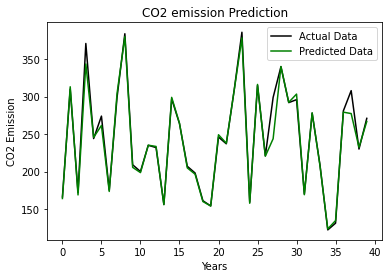

In [ ]:
plt.plot(test_labels[:40,], color = 'black', label = 'Actual Data')
plt.plot(y_pred[:40,], color = 'green', label = 'Predicted Data')
plt.title('CO2 emission Prediction by LSTM')
plt.xlabel('Years')
plt.ylabel('CO2 Emission')
plt.legend()
plt.show()

## *Artificial neural network*

In [ ]:
from sklearn.preprocessing import StandardScaler
# Convert the X, y into numpy array
y=np.array(y)
y=y.reshape((17772,1))
X=np.array(X)
print(X.shape)
# Normalize the dataset
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
y_scaled = sc.fit_transform(y)
#print(X_train)

(17772, 5)


In [ ]:
#split the X, y into test-train
X_train, X_test, Y_train,  Y_test =  split_70(X_scaled,Y_scaled)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Train on the ANN
model= Sequential()
model.add(Dense(units = 15, activation = 'relu', input_dim = 5))
model.add(Dense(units = 10, kernel_initializer='normal',activation = 'tanh', input_dim = 5))
model.add(Dense(1,kernel_initializer='normal'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
history= model.fit(X_train,Y_train,batch_size=20,epochs=200,verbose=1)
score = model.evaluate(X_test, Y_test)
print("Accuracy= ", score[1]*100)


Epoch 1/200
622/622 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 3.2154e-04
Epoch 2/200
622/622 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 4.0193e-04
Epoch 3/200
622/622 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 4.0193e-04
Epoch 4/200
622/622 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 4.0193e-04
Epoch 5/200
622/622 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 4.0193e-04
Epoch 6/200
622/622 [==============================] - 1s 2ms/step - loss: 9.8743e-04 - accuracy: 4.0193e-04
Epoch 7/200
622/622 [==============================] - 1s 2ms/step - loss: 9.4602e-04 - accuracy: 4.0193e-04
Epoch 8/200
622/622 [==============================] - 1s 1ms/step - loss: 9.3512e-04 - accuracy: 4.0193e-04
Epoch 9/200
622/622 [==============================] - 1s 2ms/step - loss: 8.9311e-04 - accuracy: 4.0193e-04
Epoch 10/200
622/622 [=================

In [ ]:
# Invert the predictions
y_pred =sc.inverse_transform(model.predict(X_test))
test_labels=sc.inverse_transform(Y_test)


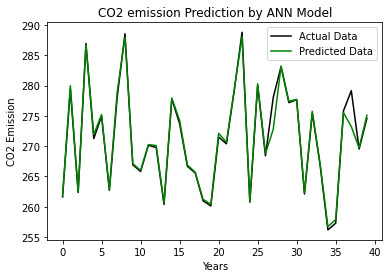

In [ ]:
#Plot the results
plt.plot(test_labels[:40,], color = 'black', label = 'Actual Data')
plt.plot(y_pred[:40,], color = 'green', label = 'Predicted Data')
plt.title('CO2 emission Prediction by ANN Model')
plt.xlabel('Years')
plt.ylabel('CO2 Emission')
plt.legend()
plt.show()

## *Classification of types of vehicles:*

In [ ]:
combined_df.describe()

,ENGINE SIZE,CYLINDERS,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
count,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000,17772.000000
mean,3.452093,5.949584,12.986434,8.881972,11.140429,27.114056,251.357810
std,1.326771,1.750693,3.484482,2.323022,2.930827,7.297715,60.212599
min,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2.400000,4.000000,10.600000,7.300000,9.200000,22.000000,210.000000
50%,3.300000,6.000000,12.500000,8.300000,10.600000,27.000000,242.000000
75%,4.300000,8.000000,15.000000,10.300000,12.900000,31.000000,290.000000
max,8.400000,16.000000,30.600000,19.000000,24.800000,78.000000,570.000000


In [ ]:
combined_df['CO2_EMISSIONS']

0        202.0
1        193.0
2        191.0
3        251.0
4        260.0
         ...  
17767    237.0
17768    230.0
17769    237.0
17770    225.0
17771    258.0
Name: CO2_EMISSIONS, Length: 17772, dtype: float64

In [ ]:
#Mapping ranges of CO2 Emission as 0-low emission, 1-medium emission, 2-high emission
criteria = [combined_df['CO2_EMISSIONS'].between(83.0, 240.0), combined_df['CO2_EMISSIONS'].between(240.0, 450.0), combined_df['CO2_EMISSIONS'].between(450.0, 570.0)]
values = [0,1,2]

combined_df['CO2_levels'] = np.select(criteria, values, 0)
combined_df['CO2_levels'].unique()

array([0, 1, 2])

In [ ]:
#clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
start_time= time.process_time()
model = KMeans(n_clusters=3)
# fit the model
model.fit(X_train)
# assign a cluster to each example
yhat = model.predict(X_test)
#print(yhat)

print("Time taken:",np.round((time.process_time()-start_time),3))
# Find the accuracy of the trained model
print("Accuracy of KMeans: {}%".format(accuracy_score(Y_test,y_pred)*100))
MAE_RF= np.mean(np.abs(Y_test-y_pred))
print("Mean absolute error(MAE):",np.round(MAE_RF,3))
RMSE_RF= np.sqrt(np.mean((Y_test-y_pred)**2))
print("RMSE =",np.round(RMSE_RF,3))
MAPE_DT= MAPE(Y_test,y_pred)
print("MAPE of model:",MAPE_DT)

Time taken: 0.495
Accuracy of KMeans: 96.32859755239836%
Mean absolute error(MAE): 1.009
RMSE = 9.116
MAPE of model: 0.3865088316298299


In [ ]:
# retrieve unique clusters
clusters = unique(yhat)
print(clusters)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
print(row_ix)
	# create scatter of these samples
#pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

[0 1 2]
(array([   2,    6,   16, ..., 7101, 7104, 7107]),)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
start_time= time.process_time()
model= RandomForestClassifier(n_estimators=50, 
                               bootstrap = True,
                               max_features= 'sqrt')

# Fit on training data
model.fit(X_train, Y_train)
# y prediction on the test data
y_pred =model.predict(X_test)
#print(y_pred)
print("Time taken:",np.round((time.process_time()-start_time),3))
# Find the accuracy of the trained model
print("Accuracy of Random forest: {}%".format(accuracy_score(Y_test,y_pred)*100))
MAE_RF= np.mean(np.abs(Y_test-y_pred))
print("Mean absolute error(MAE):",np.round(MAE_RF,3))
RMSE_RF= np.sqrt(np.mean((Y_test-y_pred)**2))
print("RMSE =",np.round(RMSE_RF,3))
MAPE_DT= MAPE(Y_test,y_pred)
print("MAPE of model:",MAPE_DT)

Time taken: 1.556
Accuracy of Random forest: 96.32859755239836%
Mean absolute error(MAE): 1.009
RMSE = 9.116
MAPE of model: 0.3865088316298299


In [ ]:
combined_df.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS,CO2_levels
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.2,7.0,8.8,32.0,202.0,0
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,M5,X,9.6,7.0,8.4,34.0,193.0,0
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4.0,M5,Z,9.4,7.0,8.3,34.0,191.0,0
3,1995,ACURA,LEGEND,COMPACT,3.2,6.0,A4,Z,12.6,8.9,10.9,26.0,251.0,1
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6.0,A4,Z,13.0,9.3,11.3,25.0,260.0,1


In [ ]:
combined_df[combined_df["CO2_EMISSIONS"] >= 500]

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,Consumption_CITY,Consumption_HWY,COMB (L/100 km),COMB (mpg),CO2_EMISSIONS,CO2_levels
3734,2000,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12.0,M6,Z,27.7,16.6,22.7,12.0,522.0,2
5832,2003,FERRARI,ENZO,TWO-SEATER,6.0,12.0,AS6,Z,30.6,17.6,24.8,11.0,570.0,2
7618,2005,DODGE,RAM SRT-10,PICKUP TRUCK - STANDARD,8.3,10.0,A4,Z,26.1,17.6,22.3,13.0,513.0,2
8636,2006,DODGE,RAM SRT-10,PICKUP TRUCK - STANDARD,8.3,10.0,A4,Z,26.1,17.6,22.3,13.0,513.0,2
12633,2010,BUGATTI,VEYRON,TWO-SEATER,8.0,16.0,AS7,Z,27.5,15.5,22.1,13.0,508.0,2
